# Юнит 2

In [3]:
import pandas as pd

In [63]:
df_wine = pd.read_csv('../data/wine_cleared.csv')

df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


In [4]:
df_wine['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [64]:
df_wine['is_france'] = df_wine['country'].apply(lambda x: 1 if x == 'France' else 0)
df_wine['is_italy'] = df_wine['country'].apply(lambda x: 1 if x == 'Italy' else 0)

display(df_wine['is_france'].sum())
display(df_wine['is_italy'].sum())

22093

19540

In [65]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
df_wine['year'] = df_wine['title'].str.findall(regex).str.get(0)
#df_wine['year'] = pd.to_datetime(df_wine['year'], errors='coerce')
df_wine.info()

#df_wine['old_wine'] = df_wine['year'].apply(lambda x: 1 if x.year < 2010 else 0)


#display(df_wine['old_wine'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  is_france              129971 non-null  int64  
 14  is_italy               129971 non-nu

In [37]:
regex02 = '\(\D*\)'
df_wine['locality'] = df_wine['title'].str.findall(regex02).str.get(0).apply(lambda x: str(x)[1:-1])
df_wine['locality'].value_counts()

a                       10522
Napa Valley              4478
Columbia Valley (WA)     4124
Russian River Valley     3091
California               2629
                        ...  
S.Af                        1
Dalmatian Coast             1
Arribes del Duero           1
Finca Élez                  1
Paestum                     1
Name: locality, Length: 1566, dtype: int64

In [28]:
s = '(Napa Valley)'
s[1:-1]

'Napa Valley'

# Юнит 3

In [40]:
df_country_population = pd.read_csv('../data/country_population.csv', sep=';')
df_country_population[df_country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


In [45]:
df_wine = df_wine.join(df_country_population.set_index('country'), on='country')
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

In [54]:
df_country_area = pd.read_csv('../data/country_area.csv', sep=';')

,country,area


In [51]:
df_wine = df_wine.join(df_country_area.set_index('country'), on='country')
df_wine.rename(columns = {'area': 'area_country'}, inplace = True)
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  obje

In [55]:
df_wine[df_wine['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,is_france,is_italy,year,old_wine,locality,population,area_country
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,Gård 2014 Grand Klasse Reserve Lawrence Vineya...,Viognier,Gård,0,0,2014-01-01,0,Columbia Valley (WA),"333,022,386",9372610.0


#  Юнит 4

In [71]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы
calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls



,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [74]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
display(calls)
calls['time_connection'].sum()

,client_id,agent_date,created_at,end_date,duration,time_connection
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1,5
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231,2
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104,0
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2,7
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215,1
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95,5
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92,2
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215,0
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94,1
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6,66


89

In [76]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls
calls['is_connection'].sum()

7

In [77]:
calls['time_diff'] =  (calls['end_date'] - calls['agent_date']).dt.seconds
calls
calls['time_diff'].sum()

1144

In [91]:
df_wine['years_diff'] = (pd.to_datetime('2022-01-12') - df_wine['year'])
df_wine['years_diff'].max()

Timedelta('98627 days 00:00:00')

# Юнит 5

In [1]:
import category_encoders as ce

In [15]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(df_wine['year'])
df_wine = pd.concat([df_wine, data_bin], axis=1)

df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  year                   125362 non-null  object 
 14  year                   129971 non-nu

In [16]:
df_wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,year,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,3


In [70]:
encoder02 = ce.OneHotEncoder()
type_bin = encoder02.fit_transform(df_wine['taster_name'])
type_bin.head()

df_wine = pd.concat([df_wine, type_bin], axis=1)

In [31]:
encoder03 = ce.BinaryEncoder()
type_bin03 = encoder03.fit_transform(df_wine['country'])

type_bin03.head()

,country_0,country_1,country_2,country_3,country_4,country_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,0,1,1
4,0,0,0,0,1,1


In [35]:
display(df_wine.describe(include='all'))

type_bin04 = encoder03.fit_transform(df_wine['taster_twitter_handle'])
type_bin04.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,year,year
count,129971.000000,129908,129971,129971,129971.000000,129971.000000,129908,129971,129971,129971,129971,129970,129971,125362,129971.000000
unique,NaN,43,119955,37980,NaN,NaN,425,1230,20,16,118840,707,16757,91,NaN
top,NaN,US,"Seductively tart in lemon pith, cranberry and ...",unknown,NaN,NaN,California,unknown,unknown,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers,2013,NaN
freq,NaN,54504,3,37465,NaN,NaN,36247,21247,26244,31213,11,13272,222,15853,NaN
mean,64985.000000,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.433566
std,37519.540256,NaN,NaN,NaN,3.039730,39.577066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.016152
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,32492.500000,NaN,NaN,NaN,86.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,64985.000000,NaN,NaN,NaN,88.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,97477.500000,NaN,NaN,NaN,91.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000


,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,0,1,1


In [40]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

encoder01 = ce.OneHotEncoder()

feature_product = encoder01.fit_transform(df['product'])
display(feature_product)

feature_payment_type = encoder01.fit_transform(df['payment_type'])
display(feature_payment_type)

,product_1,product_2,product_3
0,1,0,0
1,0,1,0
2,0,0,1


,payment_type_1,payment_type_2,payment_type_3
0,1,0,0
1,0,1,0
2,0,0,1


# Юнит 6

In [41]:
import matplotlib.pyplot as plt

(array([1.27146e+05, 2.20200e+03, 3.63000e+02, 9.80000e+01, 8.60000e+01,
        2.70000e+01, 1.20000e+01, 1.60000e+01, 5.00000e+00, 4.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   4.        ,  113.86666667,  223.73333333,  333.6       ,
         443.46666667,  553.33333333,  663.2       ,  773.06666667,
         882.93333333,  992.8       , 1102.66666667, 1212.53333333,
        1322.4       , 1432.26666667, 1542.13333333, 1652.        ,
        1761.86666667, 1871.73333333, 1981.6       , 2091.46666667,
        2201.33333333, 2311.2       , 2421.06666667, 2530.93333333,
        2640.8       , 2750.66666667, 2860.53333333, 2970.4       ,
        3080.26666667, 3190.13333333, 3300.        ]),
 <BarContainer object of 30 a

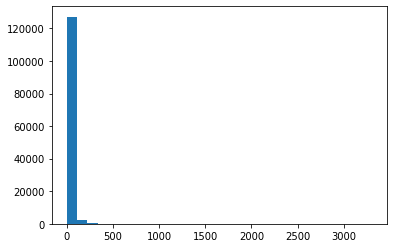

In [44]:
plt.hist(df_wine['price'], bins=30) # гистограмма распределения признака


In [47]:
from sklearn import preprocessing


In [60]:
scaler_robast = preprocessing.RobustScaler()
wine_price_scaled = scaler_robast.fit_transform(df_wine[['price']])

wine_price_scaled = pd.DataFrame(wine_price_scaled)
display(wine_price_scaled.describe())
display(wine_price_scaled.sum())

,0
count,129971.000000
mean,0.334700
std,1.798958
min,-1.090909
25%,-0.454545
50%,0.000000
75%,0.545455
max,148.727273


0    43501.229482
dtype: float64

In [62]:
scaler_std = preprocessing.StandardScaler()
wine_price_std = scaler_std.fit_transform(df_wine[['price']])

wine_price_std = pd.DataFrame(wine_price_std)
display(wine_price_std.describe())
display(wine_price_std[0][129968])

,0
count,1.299710e+05
mean,-2.520256e-17
std,1.000004e+00
min,-7.924668e-01
25%,-4.387252e-01
50%,-1.860526e-01
75%,1.171544e-01
max,8.248841e+01


-0.13551812448719314

# Юнит 7

In [67]:
df_wine['price_round'] = df_wine['price'].apply(lambda x: round(x))

<AxesSubplot:>

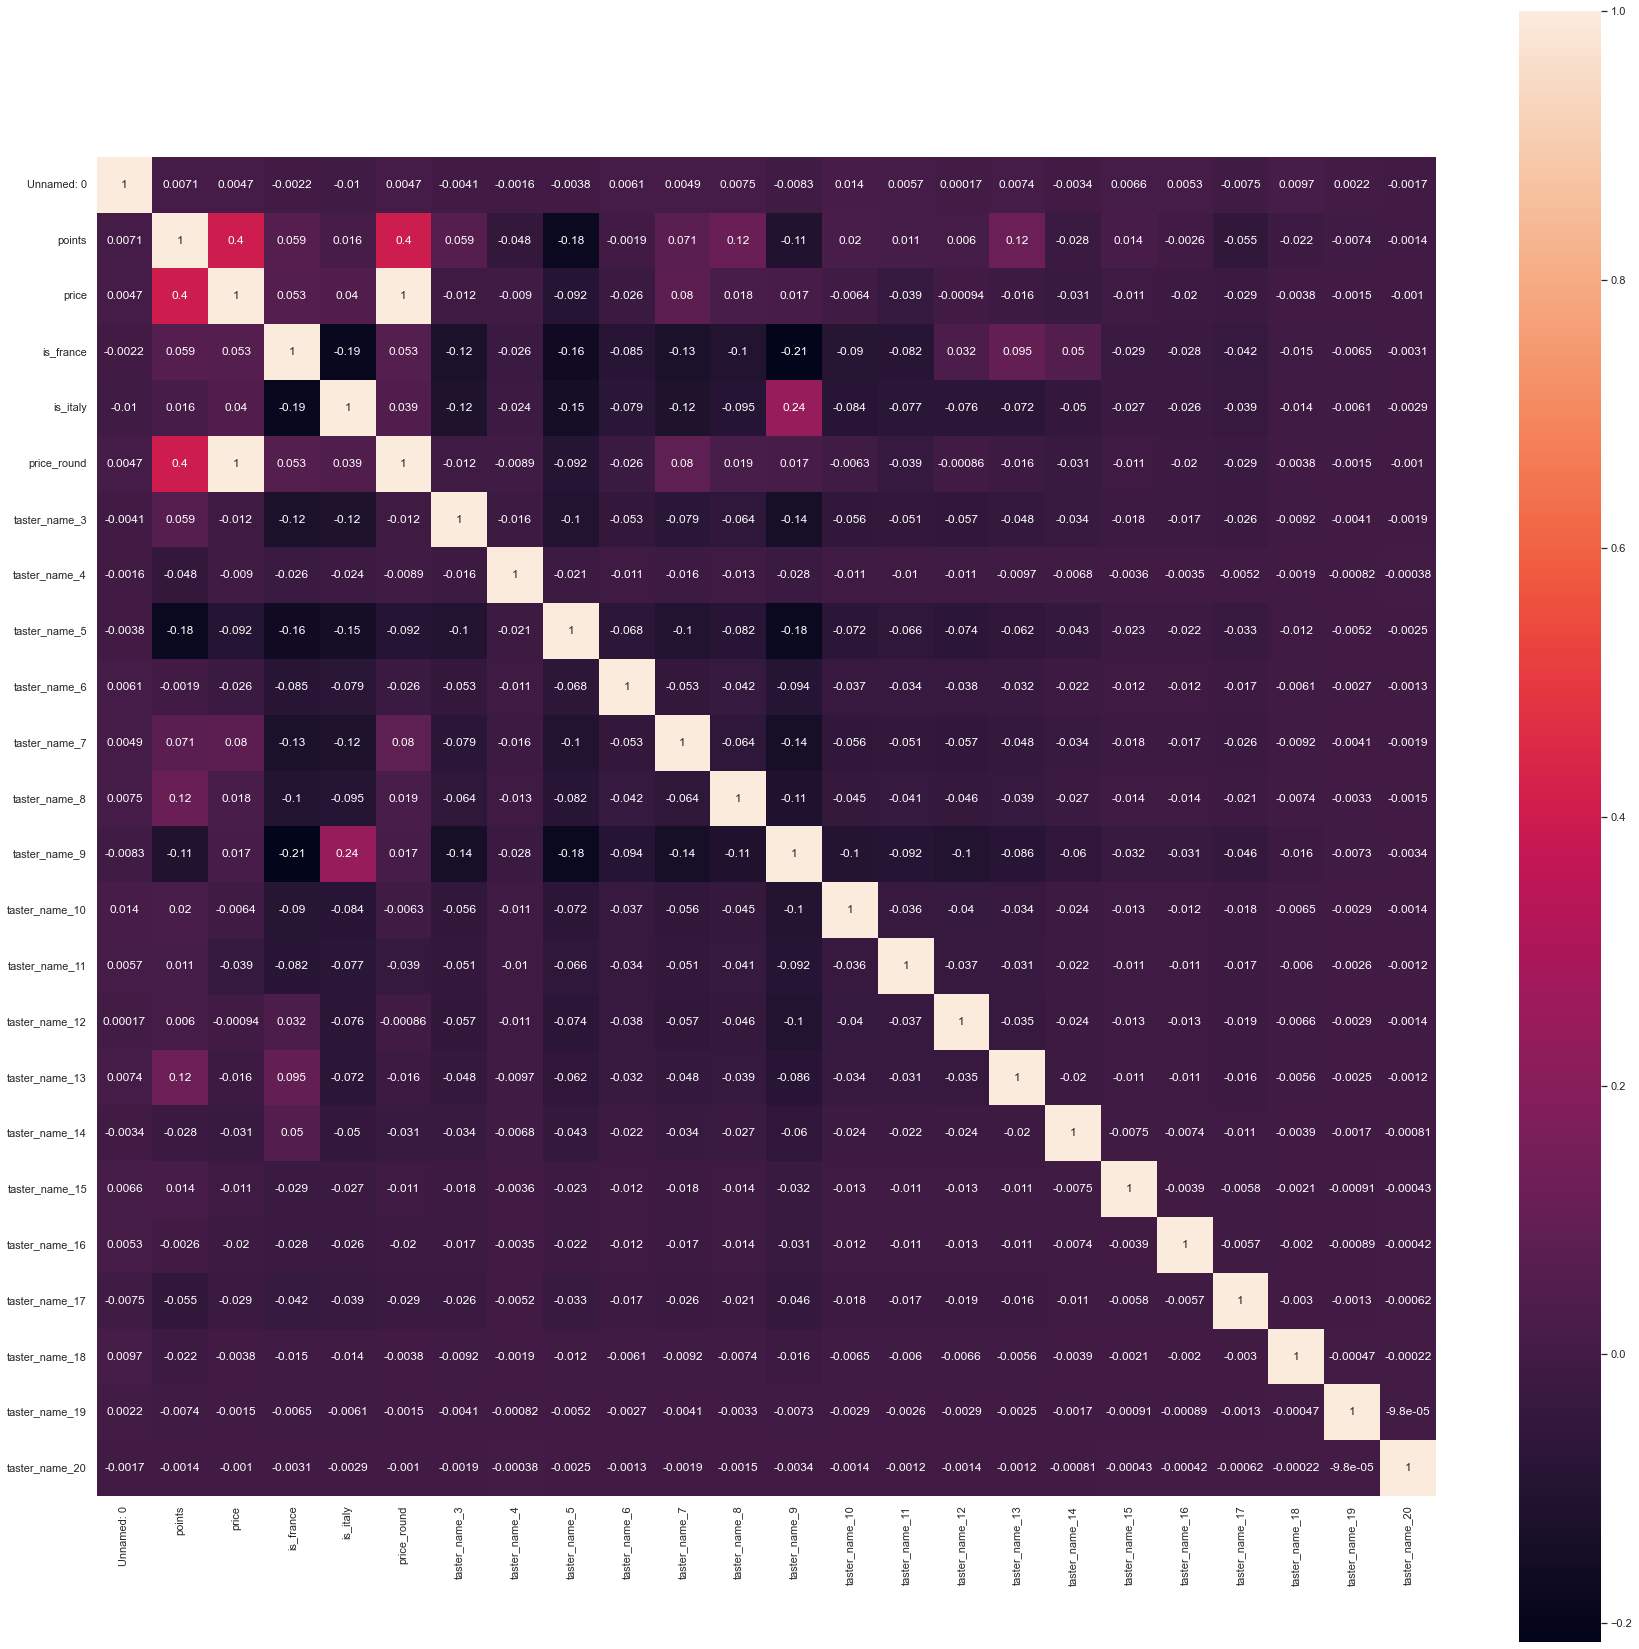

In [84]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(df_wine.corr(method='pearson'), annot=True, square=True)

In [83]:
df_wine = df_wine.drop(columns=['taster_name_1', 'taster_name_2'])
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  is_france              129971 non-null  int64  
 14  is_italy               129971 non-nu

# Юнит 8

In [109]:
heart_df = pd.read_csv('../data/heart.csv')

display(heart_df.info())
display(heart_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [110]:
heart_df['old'] = heart_df['age'].apply(lambda x: 1 if x > 60 else 0)
heart_df['old'].sum()

79

In [111]:
def trestbps_mean(age, sex):
    #print(f'Возраст {age} пол {sex}')
    if age <= 20:
        return '123/76' if sex == 1 else '116/73'
    elif  21 <= age <= 30:
        return '126/79' if sex == 1 else '120/75'
    elif  31 <= age <= 40:
        return '129/81' if sex == 1 else '127/80'
    elif  41 <= age <= 50:
        return '135/83' if sex == 1 else '137/84'
    elif  51 <= age <= 60:
        return '142/85' if sex == 1 else '144/85'
    elif  age >= 61:
        return '142/80' if sex == 1 else '159/85'
    
heart_df['trestbps_mean'] = heart_df.apply(lambda x: trestbps_mean(x['age'], x['sex']), axis=1)

heart_df.iloc[300]

age                  68
sex                   1
cp                    0
trestbps            144
chol                193
fbs                   1
restecg               1
thalach             141
exang                 0
oldpeak             3.4
slope                 1
ca                    2
thal                  3
target                0
old                   1
trestbps_mean    142/80
Name: 300, dtype: object

In [106]:
heart_df.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142/80
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129/81
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137/84
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142/85
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144/85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1,0,142/85
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1,1,159/85
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1,0,142/85
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1,0,135/83


In [112]:
encoder_oh = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
encoded_cats = encoder_oh.fit_transform(heart_df[['cp', 'restecg', 'slope', 'ca', 'thal']])

heart_df = pd.concat([heart_df, encoded_cats], axis=1)

,cp_1,cp_2,cp_3,cp_4,restecg_1,restecg_2,restecg_3,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0


In [114]:
display(encoded_cats.head())
display(heart_df.info())

,cp_1,cp_2,cp_3,cp_4,restecg_1,restecg_2,restecg_3,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    object 
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

None

In [119]:
scaler_rb = preprocessing.RobustScaler()

heart_df_sc = pd.DataFrame(scaler_rb.fit_transform(heart_df[['age', 'chol']]))

display(heart_df_sc.describe())

,0,1
count,303.000000,303.000000
mean,-0.046938,0.098646
std,0.672748,0.816232
min,-1.925926,-1.795276
25%,-0.555556,-0.456693
50%,0.000000,0.000000
75%,0.444444,0.543307
max,1.629630,5.102362


<AxesSubplot:>

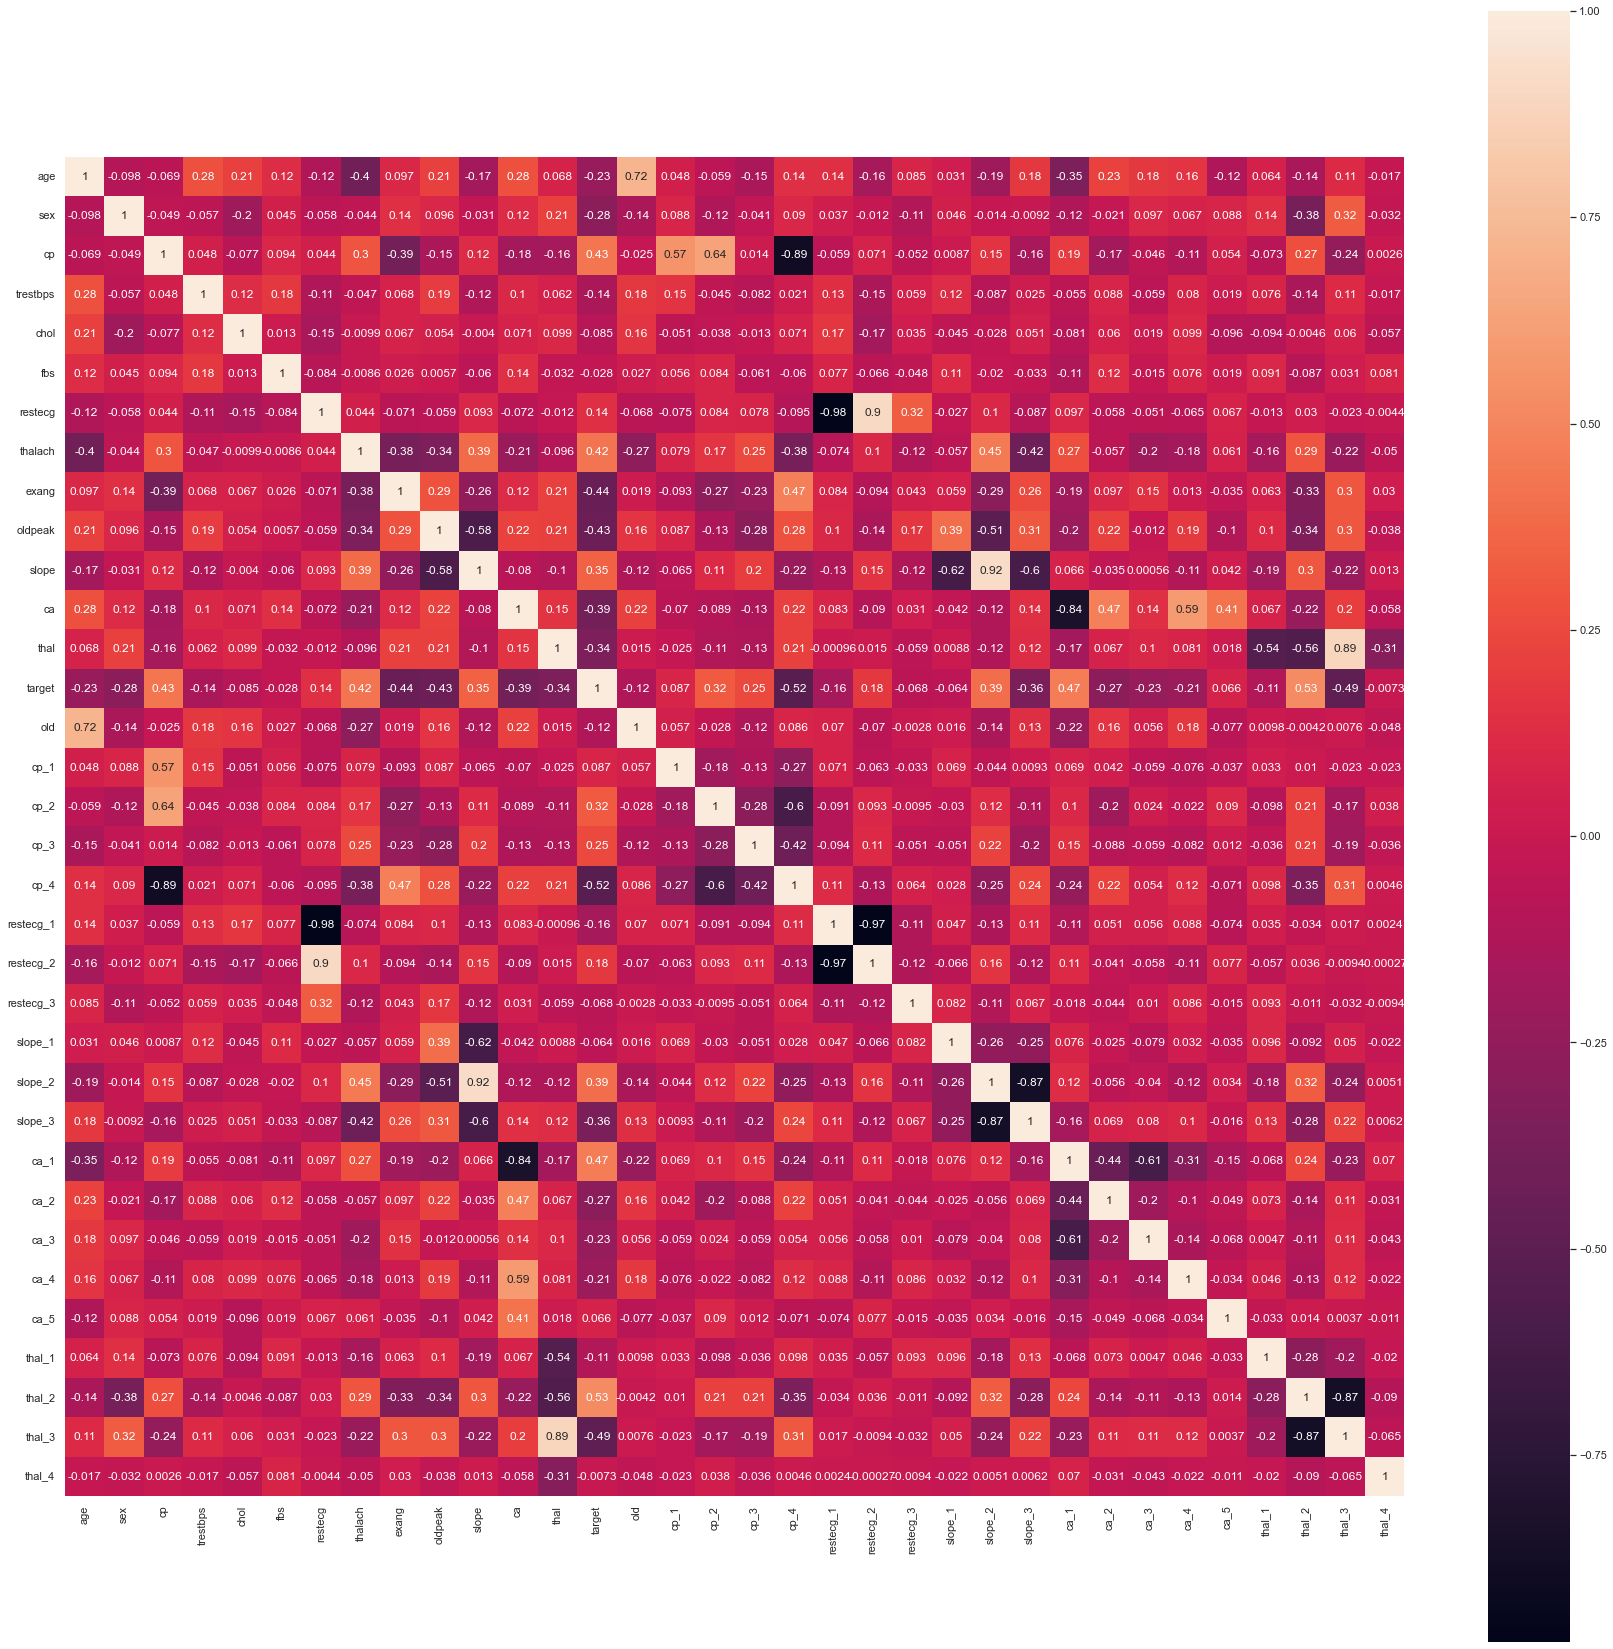

In [120]:
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(heart_df.corr(method='pearson'), annot=True, square=True)